# Stage 1 : EDA, Insights & Visualizations

In [ ]:
# Import modules
import warnings
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive

%matplotlib inline
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load DataSet
df = pd.read_csv('/content/drive/MyDrive/TravelInsurancePrediction.csv')

## Descriptive Statistics

In [ ]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.shape

(1987, 10)

**HASIL OBSERVASI :**

*   Terdapat Column Unnamed: 0 tanpa keterangan nama pada fitur ini, untuk stage 1 kami masih gunakan column ini sebagai mana adanya.
*   Pengelompokkan columns berdasarkan numericals dan categoricals.
*   Tidak adanya missing values pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat missing values).
*   Tidak adanya duplicate data pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat duplicate data).
*   Dataset ini memiliki 10 columns dan 1987 rows.

In [ ]:
# Cek Missing Values
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

> Hasil Observasi dari Cek Missing Values adalah tidak ada missing values pada data ini.



In [ ]:
# Cek Duplicate Data
df.duplicated().sum()

0



> Hasil Observasi dari Cek Data Duplicated adalah tidak ada duplicate data pada data ini.


## Statistika Summary

In [ ]:
# separated columns base on type of data
# categoricals = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
# numericals = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']

categoricals = df.select_dtypes(include='object').columns.tolist()
numericals = df.select_dtypes(include=('int64', 'float')).columns.tolist()

In [ ]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [ ]:
df[categoricals].describe().T

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


**Kesimpulan :**

1. Fitur dengan right skew atau positive skew adalah **Ag**e, **AnnualIncom**e, **ChronicDiseasses**, dan **TravelInsurance**.
2. Fitur dengan left skew atau negative skew adalah **FamilyMembers**.
3. **Unnamed: 0** tidak disebutkan dalam kedua skew tersebut karena kami menganggap fitur ini sebagai index.
4. Fitur **EmploymentType** memiliki data terbanyak pada **Private Sector/ Self Employed** dengan jumlah data 1417 .
5. Fitur **GraduateOrNot** memiliki data terbanyak pada kategori **Yes** dengan jumlah data 1692.
6. Fitur **FrequentFlyer** memiliki data terbanyak pada kategori **No** dengan jumlah data 1570.
7. Fitur **EverTravelledAbroad** memiliki data terbanyak pada kategori **No** dengan jumlah data 1607.


## Univariate Analysis

In [ ]:
# generate function for plotting numerical data
def numerical_plotting(plot):
    plt.figure(figsize=(15, 10))
    for i in range(0, len(numericals)):
        plt.subplot(1, len(numericals), i+1)
        if plot == 'box':
            sns.boxplot(y=df[numericals[i]], color='#f5b932ff', orient='v', showfliers=True)
        elif plot == 'dist':
            sns.distplot(df[numericals[i]], color='#0198a3ff')
        elif plot == 'violin':
            sns.violinplot(y=df[numericals[i]], color='#f5b932ff', orient='v')
        else :
            None
        plt.tight_layout()

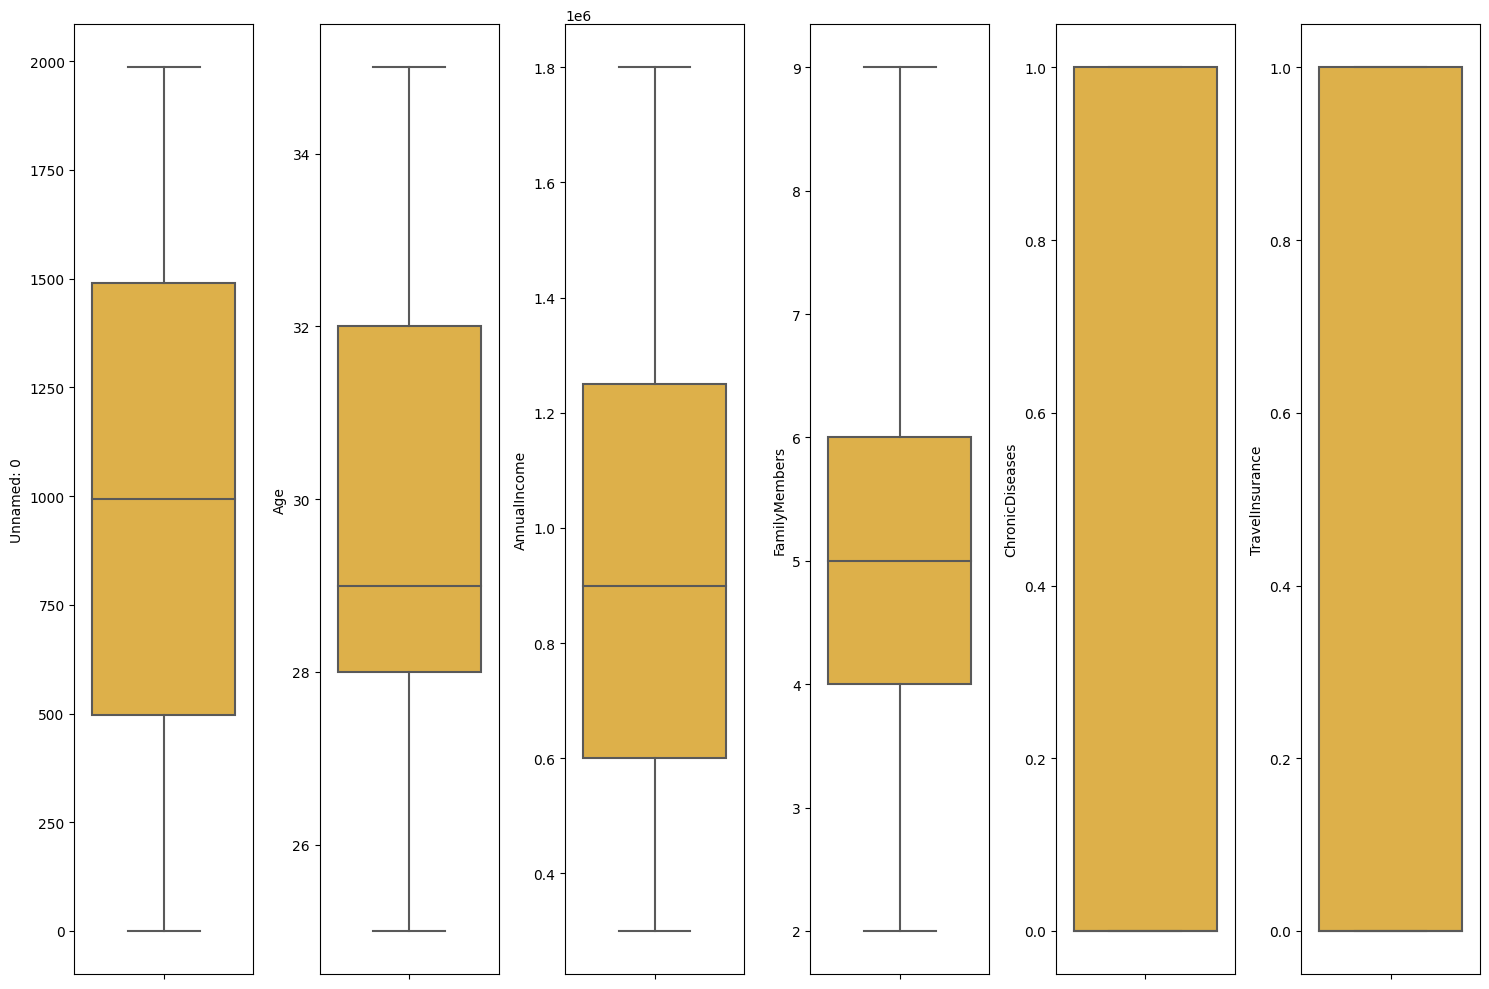

In [ ]:
# display numerical data distribution using box plot
numerical_plotting('box')

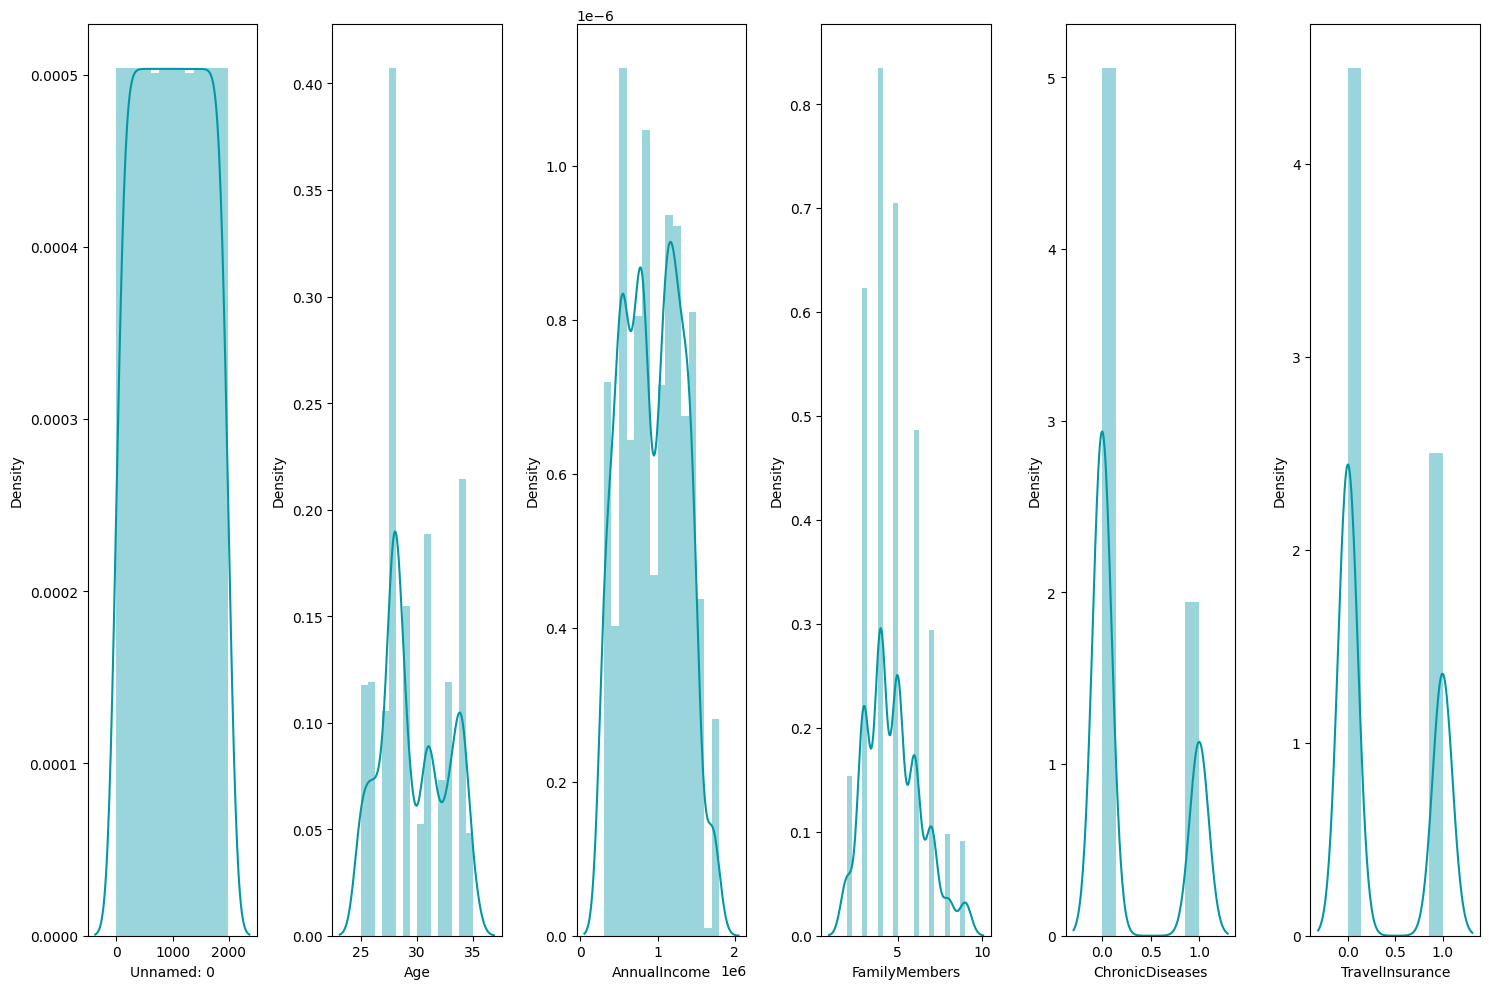

In [ ]:
# display numerical data distribution using distribution plot
numerical_plotting('dist')

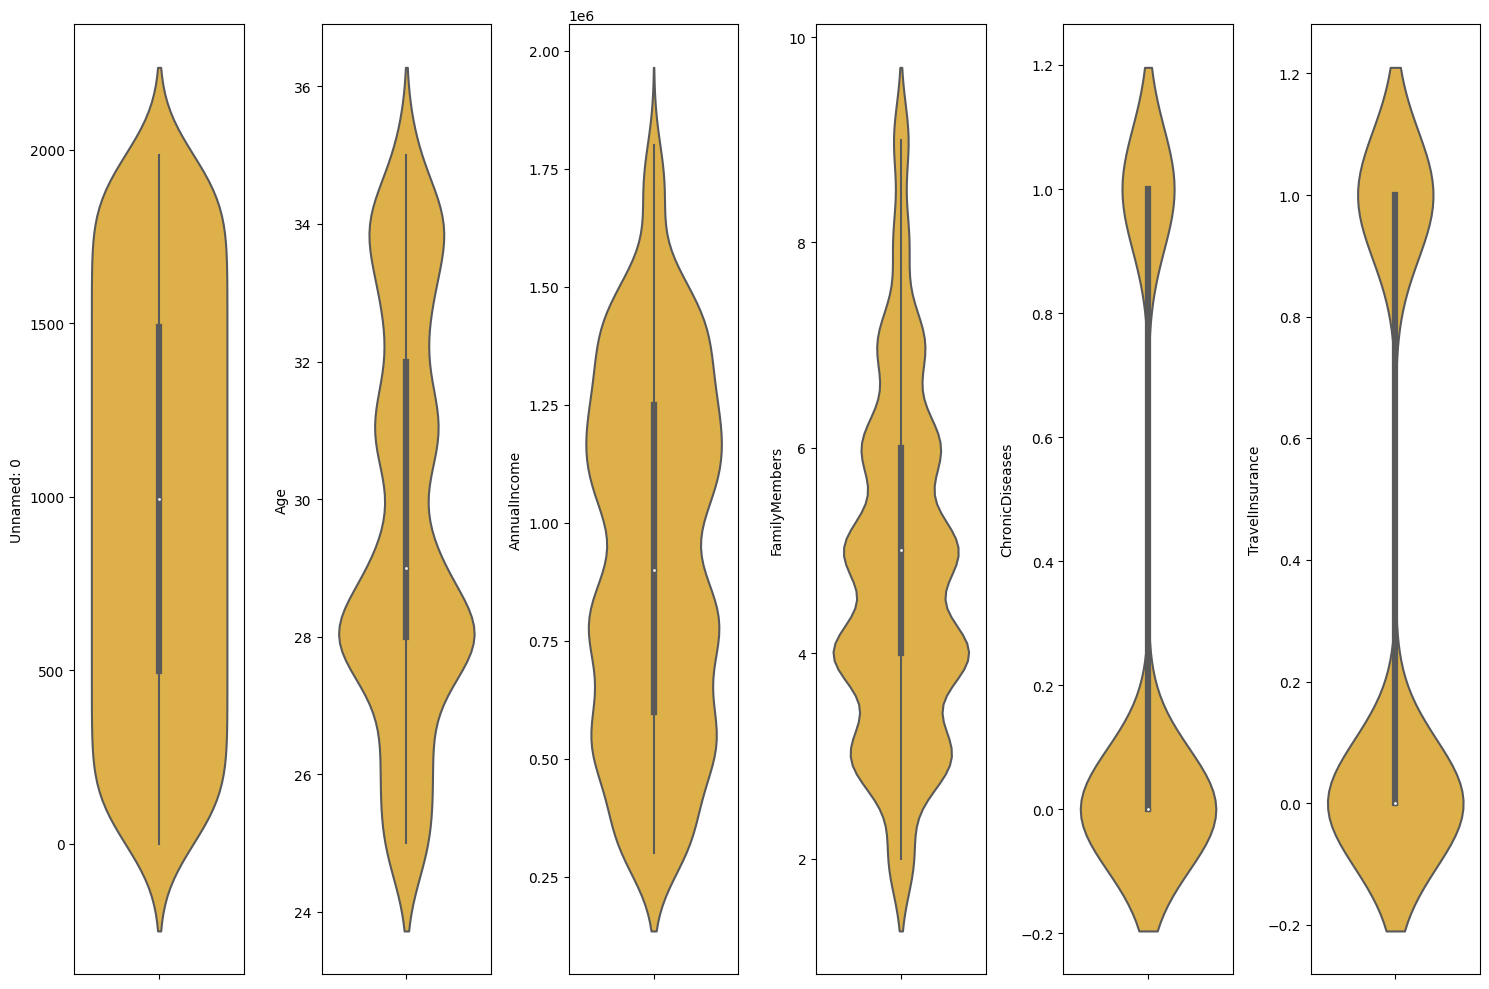

In [ ]:
# display numerical data distribution using violin plot
numerical_plotting('violin')

In [ ]:
# Mencari Outliers Menggunakan IQR
for i in df.columns:
    if df[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df[i].dtypes)

        Q1 = df[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('Lower Bound =', min_IQR)

        nilai_max = df[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('Upper Bound =', max_IQR)

        # Mencari outliers
        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df[df[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df[df[i] > max_IQR].index))

        print('\n')

Unnamed: 0 : int64
Q1 = 496.5
Q3 = 1489.5
IQR = 993.0
nilai min = 0
Lower Bound = -993.0
nilai max = 1986
Upper Bound = 2979.0


Age : int64
Q1 = 28.0
Q3 = 32.0
IQR = 4.0
nilai min = 25
Lower Bound = 22.0
nilai max = 35
Upper Bound = 38.0


AnnualIncome : int64
Q1 = 600000.0
Q3 = 1250000.0
IQR = 650000.0
nilai min = 300000
Lower Bound = -375000.0
nilai max = 1800000
Upper Bound = 2225000.0


FamilyMembers : int64
Q1 = 4.0
Q3 = 6.0
IQR = 2.0
nilai min = 2
Lower Bound = 1.0
nilai max = 9
Upper Bound = 9.0


ChronicDiseases : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 1
Upper Bound = 2.5


TravelInsurance : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 1
Upper Bound = 2.5




**Kesimpulan :**


* Tidak terdapat outlier pada data numerical, sehingga tidak perlu dilakukan handling outliers pada stage data preprocessing
* Age distribusi bimodal perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma
* annualIncome distribusi mendekati normal
* familyMembers skew kanan perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma
*   ChronicDiseases dan TravelInsurance perlu diubah tipe datanya menjadi categorical, dikarenakan ChronicDiseases dan TravelInsurance hanya berisi 1 dan 0






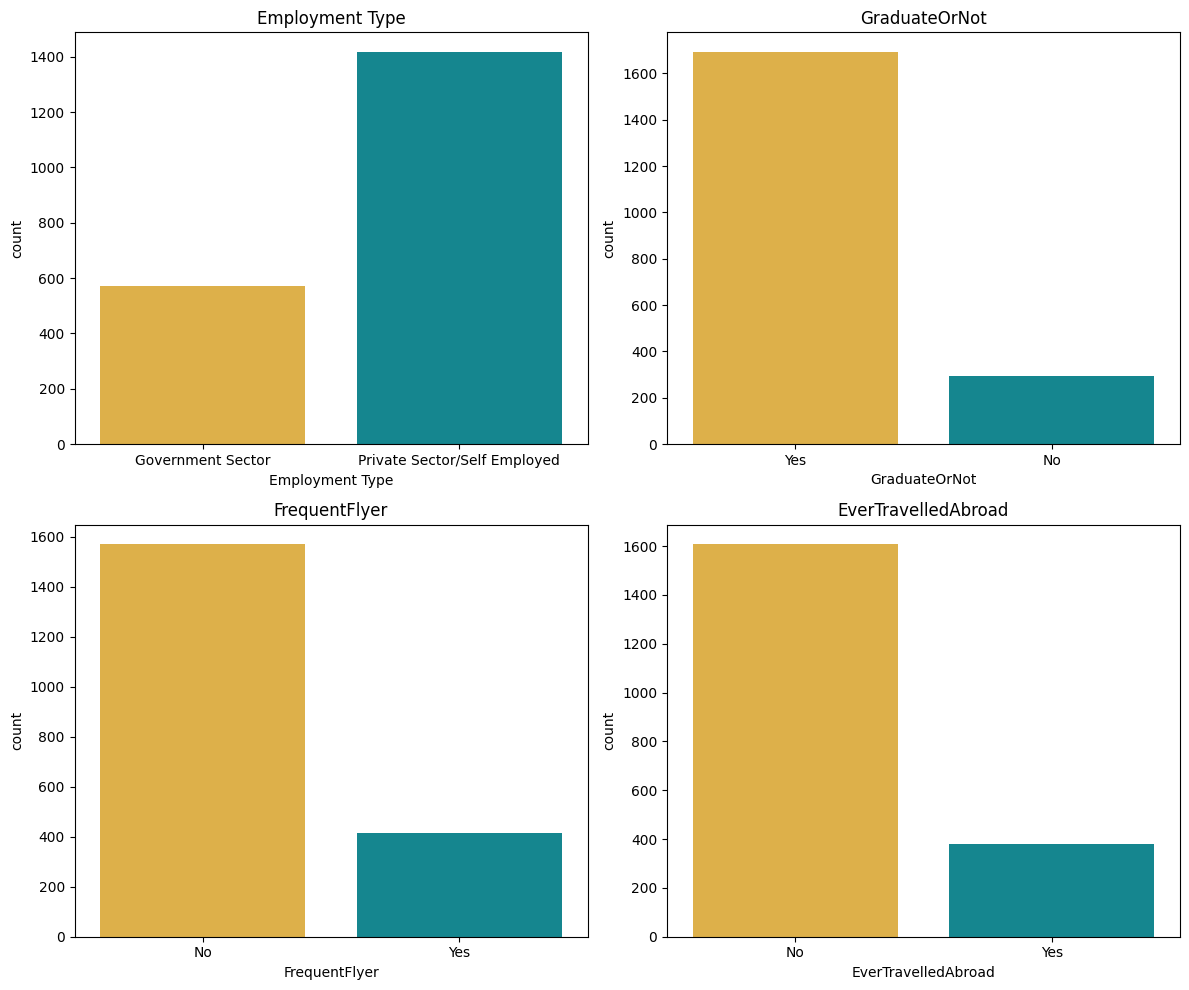

In [ ]:
#Categorical data
# Calculate the number of rows and columns for the subplot grid
num_rows = int(len(categoricals) / 2) + len(categoricals) % 2
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

colors = ['#f5b932ff', '#0198a3ff']

# count plots
for i, cat_var in enumerate(categoricals):
    sns.countplot(x=cat_var, data=df, ax=axes[i], palette = colors)
    axes[i].set_title(cat_var)

# Hide any remaining empty subplots
for i in range(len(categoricals), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
proportions = {}
for cat_var in categoricals:
    proportions[cat_var] = (df[cat_var].value_counts() / len(df)) * 100

# Display Proportions and Percentages
for cat_var in categoricals:
    print(f"Proportions for {cat_var}:")
    print(proportions[cat_var])
    print("\n")

Proportions for Employment Type:
Private Sector/Self Employed    71.313538
Government Sector               28.686462
Name: Employment Type, dtype: float64


Proportions for GraduateOrNot:
Yes    85.153498
No     14.846502
Name: GraduateOrNot, dtype: float64


Proportions for FrequentFlyer:
No     79.013588
Yes    20.986412
Name: FrequentFlyer, dtype: float64


Proportions for EverTravelledAbroad:
No     80.875692
Yes    19.124308
Name: EverTravelledAbroad, dtype: float64




**Observations:**

All the categorical features are binary. No further actions are required for now.

There is no class imbalance.


## Multivariate Analysis

In [ ]:
#membuat dataframe copy untuk keperluan heatmap saja
df2=df.drop(df.columns[0], axis=1)
df3=df2.copy()

In [ ]:
#melakukan mapping df3 untuk keperluan heatmap only
mapping_EmploymentType = {'Government Sector':1,'Private Sector/Self Employed':0}
mapping_GraduateOrNot = {'Yes':1,'No':0}
mapping_FrequentFlyer = {'Yes':1,'No':0}
mapping_EverTravelledAbroad = {'Yes':1,'No':0}

df3['Employment Type']= df2['Employment Type'].map(mapping_EmploymentType)
df3['GraduateOrNot']= df2['GraduateOrNot'].map(mapping_GraduateOrNot)
df3['FrequentFlyer']= df2['FrequentFlyer'].map(mapping_FrequentFlyer)
df3['EverTravelledAbroad']= df2['EverTravelledAbroad'].map(mapping_EverTravelledAbroad)

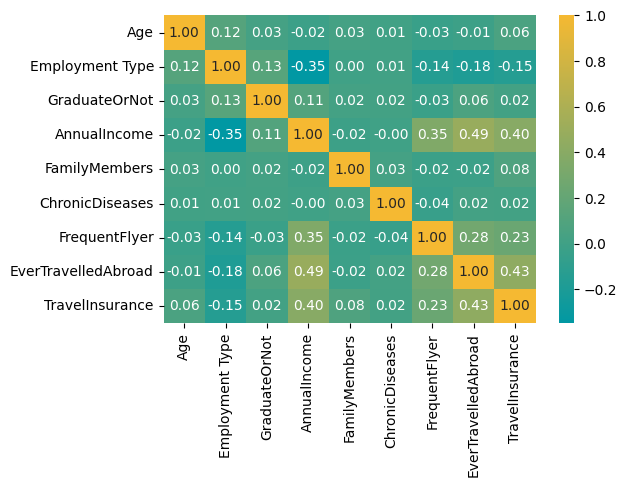

In [ ]:
import matplotlib.colors as mcolors
blue_yellow_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#0198a3ff', '#f5b932ff'])

plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(), cmap=blue_yellow_cmap, annot=True, fmt='.2f')

plt.show()

In [ ]:
#pengelompokan untuk pairplot/stripplot
plot_cat = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','FrequentFlyer','EverTravelledAbroad','TravelInsurance']
plot_num = ['Age', 'AnnualIncome', 'FamilyMembers']

In [ ]:
colors = ['#f5b932ff', '#0198a3ff']

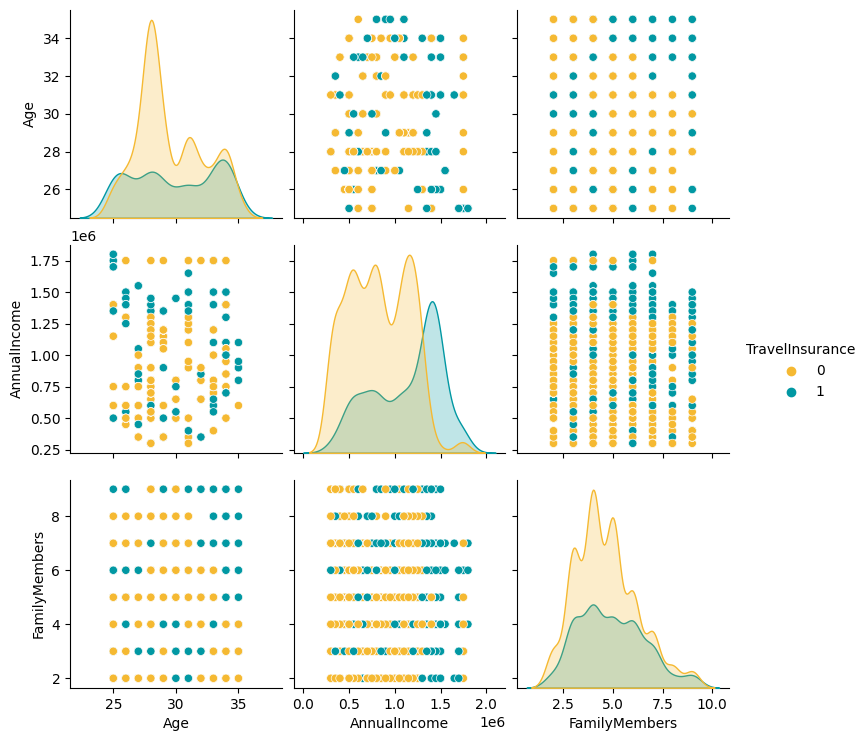

In [ ]:
sns.pairplot(df[plot_cat], diag_kind='kde',hue='TravelInsurance', palette = colors)

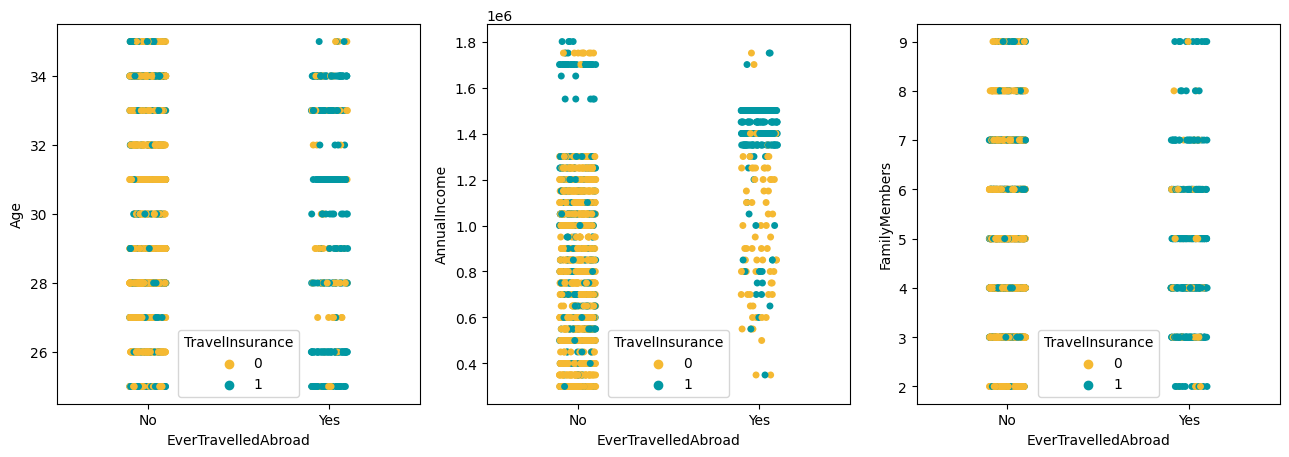

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='EverTravelledAbroad', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

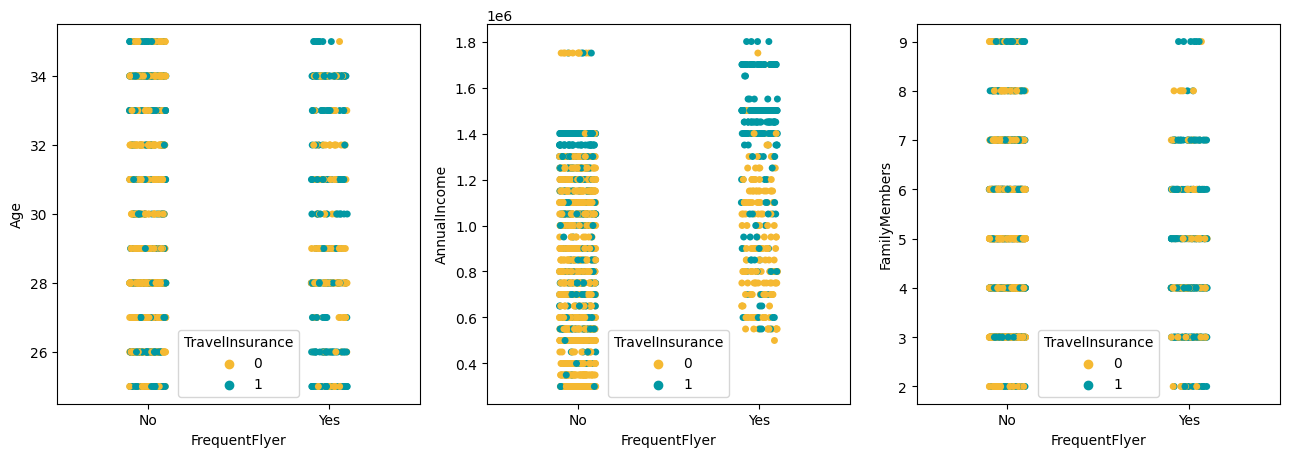

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='FrequentFlyer', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

Dari Striplot di atas terlihat cukup konsisten antara feature EverTraveledAbroad,FrequentFlyer, AnnualIncome dengan label (TravelInsurance)

## Kesimpulan</br>
* Terdapat pasang-pasangan feature yang berkorelasi satu sama lain yaitu :</br>
  * FreqentFlyer dan Annual Income (0.35) </br>
  * EverTravelledAbroad dan Annual Income(0.49)</br>
  * EmploymentType dan Annual Income (-0.35)</br>
  (EmplomentType : Private Sector/Self Employed berkorelasi positif dengan Annual Income, Government Sector berkorelasi negatif dengan Annual Income)
  * EverTravelledAbroad dan FrequentFlyer(0.28)</br>
* Sedangkan feature-feature yang memiliki korelasi tinggi dengan label :</br>
  * TravelInsurance dan Annual Income(0.40)</br>
  * TravelInsurance dan FrequentFlyer(0.23)</br>
  * TravelInsurance dan EverTravelledAbroad(0.43)</br>



## Rekomendasi : </br>
* untuk heatmap, tidak ada fitur yang redundant >0.7, jadi tidak perlu ada fitur yang dihilangkan </br>
* untuk antar feature yang memiliki korelasi tinggi, bisa di explore lebih lanjut</br>

##Insight & Business Recommendation


### Low Level Analysis (2 Parameter Analysis)

In [ ]:
travel = df.groupby(df['TravelInsurance'])['Unnamed: 0'].count().reset_index()
from decimal import ROUND_UP
travel['Percentage_TI']=round(travel['Unnamed: 0']/(sum(travel['Unnamed: 0']))*100,0)
travel


,TravelInsurance,Unnamed: 0,Percentage_TI
0,0,1277,64.0
1,1,710,36.0


([<matplotlib.patches.Wedge at 0x7ef2eacaf9a0>,
 [Text(-0.46835717599151955, 0.995309778760989, '0'),
  Text(0.468357175991519, -0.9953097787609894, '1')],
 [Text(-0.2554675505408288, 0.5428962429605394, '64%'),
  Text(0.2554675505408285, -0.5428962429605396, '36%')])

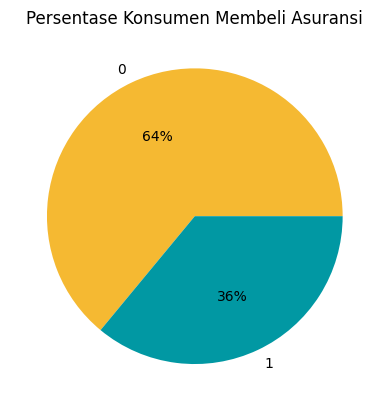

In [ ]:
plt.title('Persentase Konsumen Membeli Asuransi')
plt.pie(travel['Percentage_TI'],labels=travel['TravelInsurance'],autopct='%.0f%%', colors = colors)

Insight : Persentase pelanggan yang tidak tertarik membeli travel insurance lebih besar yaitu sebesar 64%.

In [ ]:
age1 = df.groupby(['Age','TravelInsurance']).size().unstack().reset_index()
age1['total'] = age1.drop('Age', axis=1).sum(axis=1)

age1_percentage = age1.copy()
for col in age1_percentage.columns[1:3]:
    age1_percentage[col] = age1_percentage[col] / age1_percentage['total'] * 100

age1_percentage = age1_percentage.drop('total', axis=1)
age1_percentage = age1_percentage.reset_index(drop=True)
age1_percentage = age1_percentage.drop('Age', axis=1)

age1_percentage

TravelInsurance,0,1
0,36.986301,63.013699
1,50.000000,50.000000
2,79.389313,20.610687
3,79.249012,20.750988
4,73.437500,26.562500
5,56.923077,43.076923
6,67.948718,32.051282
7,79.120879,20.879121
8,47.297297,52.702703
9,50.000000,50.000000


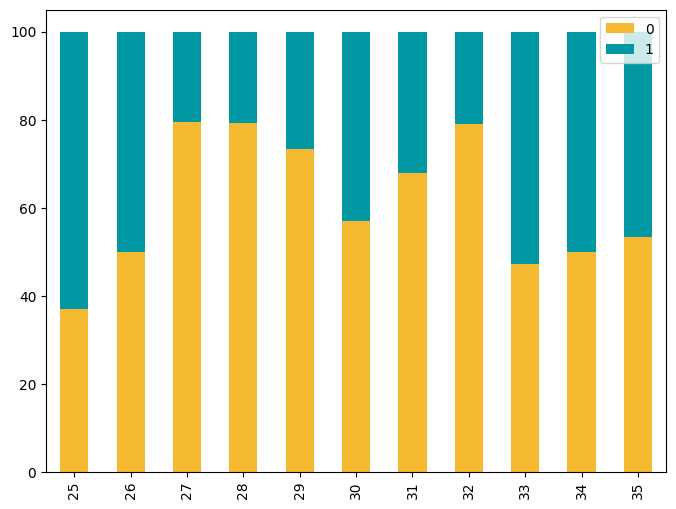

In [ ]:
age = list(range(25, 36))
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = age1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(age)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan umur 27-32tahun terlihat banyak yang tidak tertarik untuk membeli travel insurance. Sedangkan pelanggan umur <= 26 dan >=33 terlihat banyak yg tertarik membeli.



In [ ]:
et1 = df.groupby(['Employment Type','TravelInsurance']).size().unstack().reset_index()
et1['total'] = et1.sum(axis=1)

et1_percentage = et1.copy()
for col in et1_percentage.columns[1:-1]:
    et1_percentage[col] = et1_percentage[col] / et1_percentage['total'] * 100

et1_percentage = et1_percentage.drop('total', axis=1)
et1_percentage = et1_percentage.reset_index(drop=True)

et1_percentage

TravelInsurance,Employment Type,0,1
0,Government Sector,75.438596,24.561404
1,Private Sector/Self Employed,59.774171,40.225829


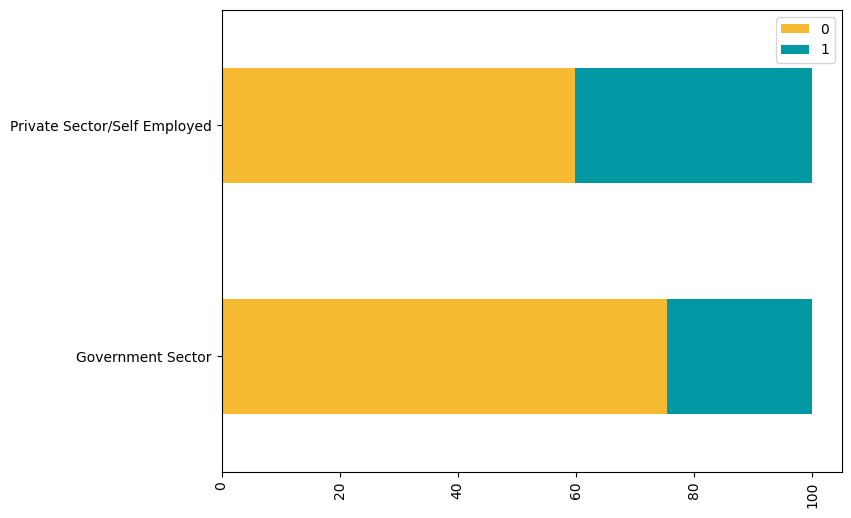

In [ ]:
employment = ['Government Sector', 'Private Sector/Self Employed']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = et1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(employment)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan tipe pekerjaan private sector/self employed lebih tertarik membeli travel insurance sebesar 80% dibanding government sector yang hanya tertarik 20% saja.

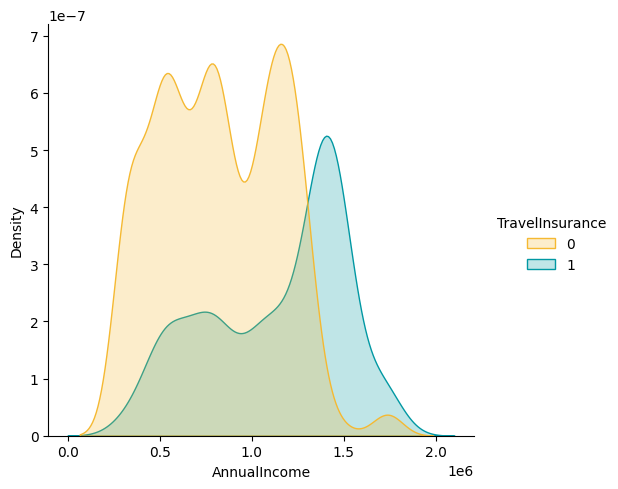

In [ ]:
sns.displot(df, x = 'AnnualIncome',hue = 'TravelInsurance',kind='kde',fill=True, palette = colors)

> Insight : Terjadi kenaikan tajam pada pelanggan dengan pendapatan tahunan
diatas 1.3M untuk tertarik untuk membeli asuransi perjalanan.


In [ ]:
gr1 = df.groupby(['GraduateOrNot','TravelInsurance']).size().unstack().reset_index()
gr1['total'] = gr1.sum(axis=1)

gr1_percentage = gr1.copy()
for col in gr1_percentage.columns[1:-1]:
    gr1_percentage[col] = gr1_percentage[col] / gr1_percentage['total'] * 100


gr1_percentage = gr1_percentage.drop('total', axis=1)
gr1_percentage = gr1_percentage.reset_index(drop=True)

gr1_percentage

TravelInsurance,GraduateOrNot,0,1
0,No,66.440678,33.559322
1,Yes,63.888889,36.111111


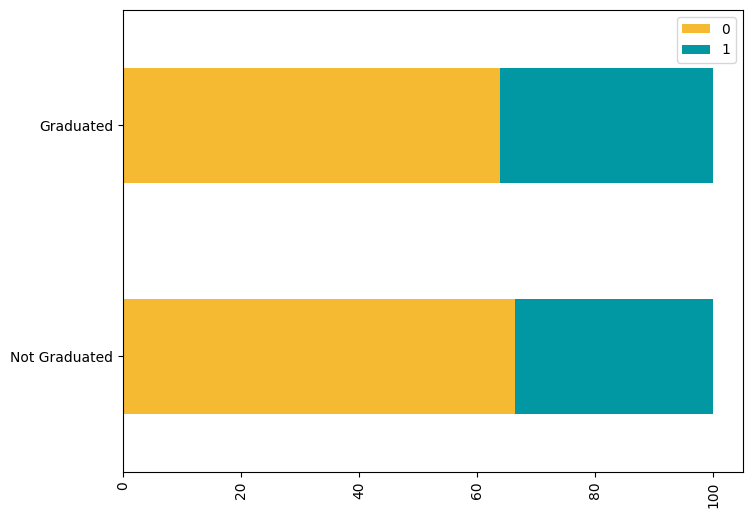

In [ ]:
graduate = ['Not Graduated', 'Graduated']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = gr1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(graduate)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insigt : Pelanggan dengan lulusan perguruan tinggi ataupun bukan, tidak memiliki dampak pada ketertarikan pembelian travel insurance.



In [ ]:
fm1 = df.groupby(['FamilyMembers','TravelInsurance']).size().unstack().reset_index()
fm1['total'] = fm1.drop('FamilyMembers', axis=1).sum(axis=1)

fm1_percentage = fm1.copy()
for col in fm1_percentage.columns[1:3]:
    fm1_percentage[col] = fm1_percentage[col] / fm1_percentage['total'] * 100

fm1_percentage = fm1_percentage.drop('total', axis=1)
fm1_percentage = fm1_percentage.reset_index(drop=True)
fm1_percentage = fm1_percentage.drop('FamilyMembers', axis=1)

fm1_percentage

TravelInsurance,0,1
0,70.967742,29.032258
1,64.190981,35.809019
2,68.316832,31.683168
3,69.248826,30.751174
4,56.122449,43.877551
5,54.494382,45.505618
6,64.406780,35.593220
7,52.727273,47.272727


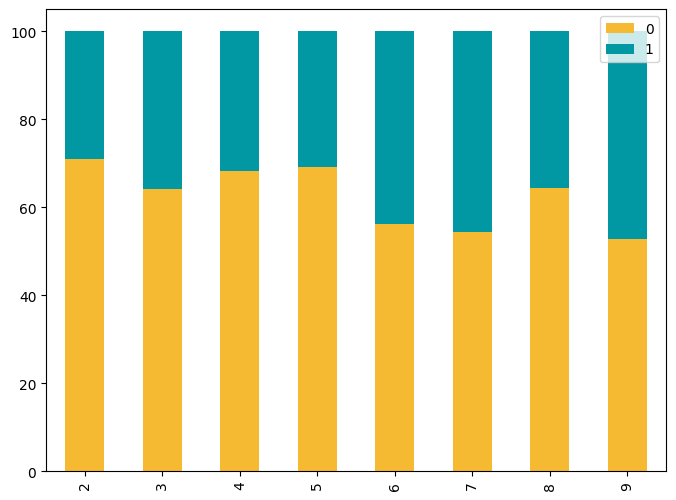

In [ ]:
familymember = list(range(2, 10))
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = fm1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(list(familymember))  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Keluarga dengan jumlah anggota 6 orang keatas lebih terlihat tertarik untuk membeli travel insurance, sedangkan yang berjumlah 2 orang terlihat hanya sedikit yang tertarik dan keluarga dengan anggota 3-5 orang agak banyak tertarik.



In [ ]:
cd1 = df.groupby(['ChronicDiseases','TravelInsurance']).size().unstack().reset_index()
cd1['total'] = cd1.sum(axis=1)

cd1_percentage = cd1.copy()
for col in cd1_percentage.columns[1:-1]:
    cd1_percentage[col] = cd1_percentage[col] / cd1_percentage['total'] * 100

cd1_percentage = cd1_percentage.drop('total', axis=1)
cd1_percentage = cd1_percentage.reset_index(drop=True)

cd1_percentage

TravelInsurance,ChronicDiseases,0,1
0,0,64.808362,35.191638
1,1,62.748644,37.070524


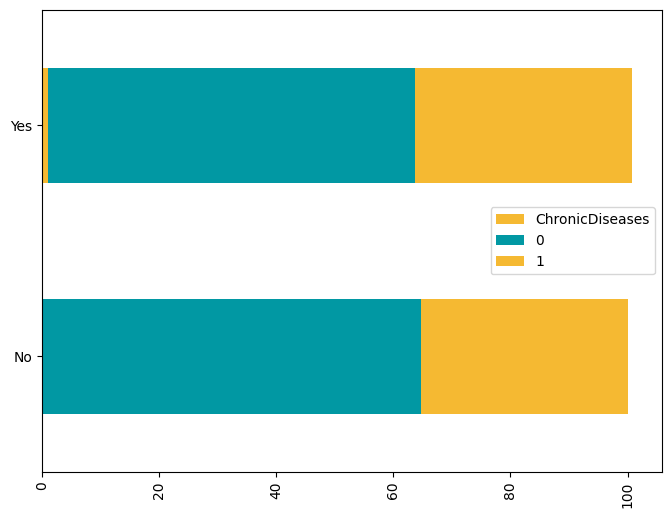

In [ ]:
chronic = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = cd1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(chronic)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan penyakit bawaan maupun tidak, tidak memiliki dampak yang signifikan pada pembelian travel insurance.

In [ ]:
eta1 = df.groupby(['EverTravelledAbroad','TravelInsurance']).size().unstack().reset_index()
eta1['total'] = eta1.sum(axis=1)

eta1_percentage = eta1.copy()
for col in eta1_percentage.columns[1:-1]:
    eta1_percentage[col] = eta1_percentage[col] / eta1_percentage['total'] * 100

eta1_percentage = eta1_percentage.drop('total', axis=1)
eta1_percentage = eta1_percentage.reset_index(drop=True)

eta1_percentage

TravelInsurance,EverTravelledAbroad,0,1
0,No,74.362166,25.637834
1,Yes,21.578947,78.421053


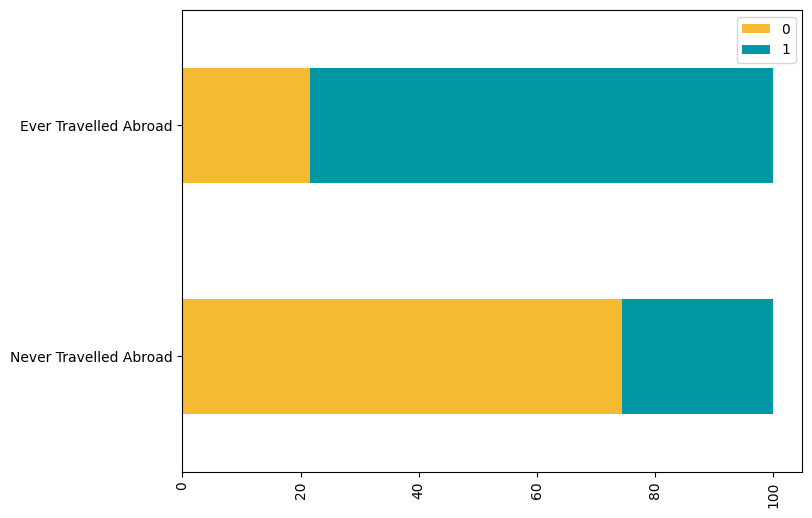

In [ ]:
travel = ['Never Travelled Abroad', 'Ever Travelled Abroad']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = eta1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(travel)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Secara signifikan pelanggan yang melakukan perjalanan abroad lebih banyak tertarik untuk membeli travel insurance yaitu sebesar 42% dibanding yang tidak membeli. Sedangkan pelanggan yang tidak melakukan perjalanan abroad merasa tidak tertarik untuk membeli travel insurance.

In [ ]:
ff1 = df.groupby(['FrequentFlyer','TravelInsurance']).size().unstack().reset_index()
ff1['total'] = ff1.sum(axis=1)

ff1_percentage = ff1.copy()
for col in ff1_percentage.columns[1:-1]:
    ff1_percentage[col] = ff1_percentage[col] / ff1_percentage['total'] * 100

ff1_percentage = ff1_percentage.drop('total', axis=1)
ff1_percentage = ff1_percentage.reset_index(drop=True)

ff1_percentage

TravelInsurance,FrequentFlyer,0,1
0,No,70.000000,30.000000
1,Yes,42.685851,57.314149


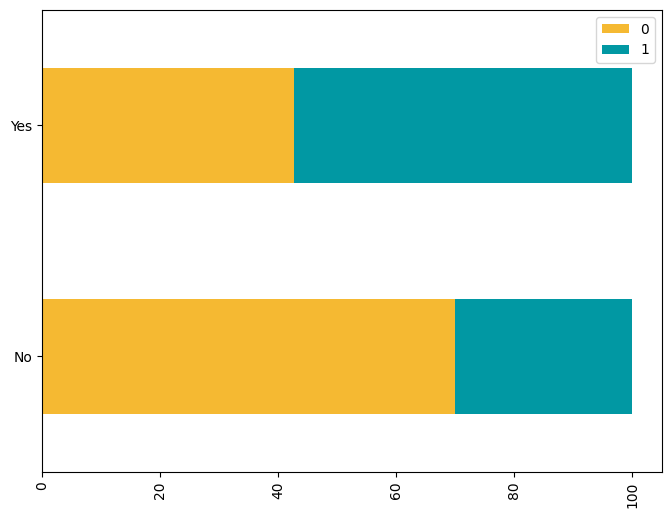

In [ ]:
freqflyer = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = ff1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(freqflyer)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan yang sering melakukan penerbangan lebih banyak tertarik untuk membeli travel insurance.

### High Level Analysis (Analisis 3 Parameter atau Lebih)

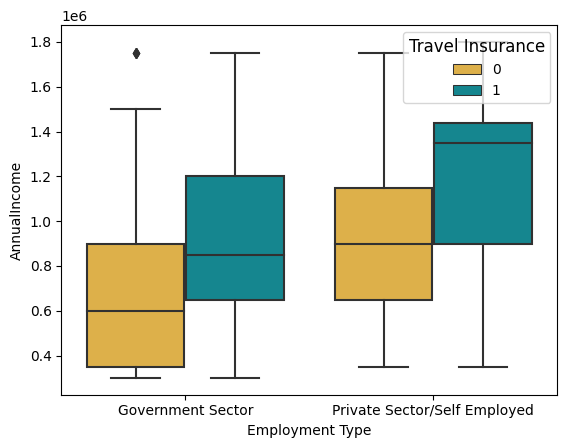

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['Employment Type'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

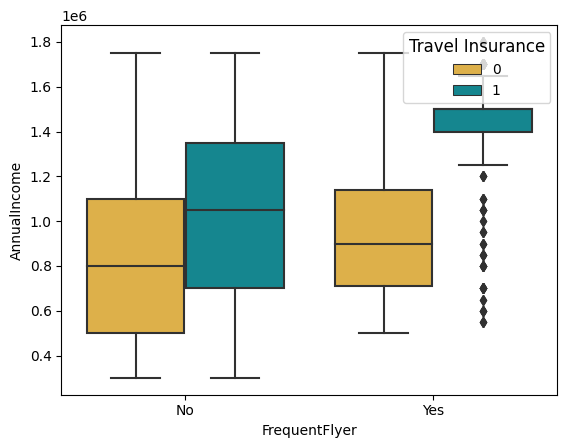

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['FrequentFlyer'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

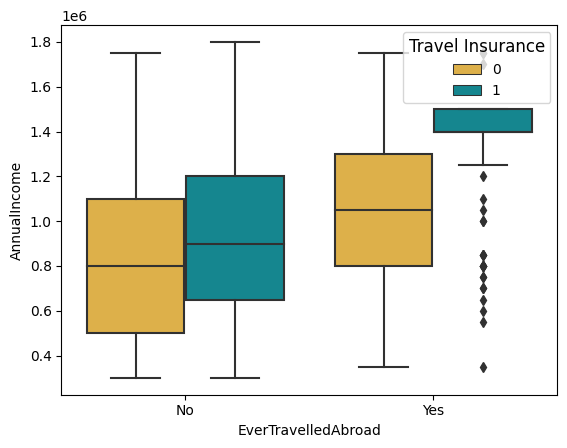

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['EverTravelledAbroad'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

### Business Recommendation
- Menargetkan promo penawaran terhadap target pelanggan dengan kriteria
    - bekerja di private sector/self employment.
    - memiliki annual income diatas 1.3M.
    - merupakan lulusan perguruan tinggi.
    - pernah melakukan perjalanan keluar negeri.
    - Sering melakukan penerbangan.
- Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun.
- Membagi jumlah anggota keluarga menjadi 3 kategori.
- Membuat prioritas terhadap pelanggan dengna kriteria :
    - Memprioritaskan penawaran kepada pelanggan yang bekerja di private sector dan memiliki annual income 1,0 - 11,4 M .
    - Memiliki annual income 0,8 - 1,4 M yang belum sering melakukan penerbangan.
    - Memprioritaskan kepada pelanggan yang belum pernah melakukan penerbangan ke luar negeri dan memiliki pendapatan sekitar 0,7 - 1,2 M.




# Stage II : Data Preprocessing

## Duplicated Values

In [ ]:
# Handle Duplicated Values
num_duplicates = df.isnull().sum().sum()
print('Number of duplicated values: ', num_duplicates)

Number of duplicated values:  0


## Outliers

In [ ]:
#Handle outliers
def detect_outliers(data):
  for i in data.columns:
  # Check if the data type of the column is int64 or float64
    if((data[i].dtype == 'int64') | (data[i].dtype == 'float64')):
      q25 = percentile(data[i], 25)
      q75 = percentile(data[i], 75)
      iqr = q75 - q25
      cutoff = 1.5 * iqr
      lower = q25 - cutoff
      upper = q75 + cutoff
      print(i)
      print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')
      print('The Number of Row Above Upper Limits :' ,(len(data[data[i] > upper])) / len(data))
      print('The Number of Row Below Lower Limits :' ,(len(data[data[i] < lower])) / len(data))

In [ ]:
detect_outliers(df)

Unnamed: 0
The Lower Limit is : -993.0, The Upper Limit is : 2979.0
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0
Age
The Lower Limit is : 22.0, The Upper Limit is : 38.0
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0
AnnualIncome
The Lower Limit is : -375000.0, The Upper Limit is : 2225000.0
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0
FamilyMembers
The Lower Limit is : 1.0, The Upper Limit is : 9.0
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0
ChronicDiseases
The Lower Limit is : -1.5, The Upper Limit is : 2.5
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0
TravelInsurance
The Lower Limit is : -1.5, The Upper Limit is : 2.5
The Number of Row Above Upper Limits : 0.0
The Number of Row Below Lower Limits : 0.0


In [ ]:
df.sample()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1749,1749,33,Government Sector,Yes,1100000,4,1,No,Yes,0


## Feature Selection

In [ ]:
#Rename kolom Unnamed:0 menjadi IDNumber karena berdasarkan eksperimen, jika kolom ini dihapus atau dijadikan index maka duplikat data menjadi banyak, sehingga kami asumsikan kolom ini sebagai IDNumber
df= df.rename(columns = {"Unnamed: 0": "IDNumber"})
df.head()

,IDNumber,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


> Rename kolom Unnamed:0 menjadi IDNumber karena berdasarkan eksperimen, jika kolom ini dihapus atau dijadikan index maka duplikat data menjadi banyak, sehingga kami asumsikan kolom ini sebagai IDNumber.



In [ ]:
# Business Recommendation: Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun.

# Creating a numpy array of Age values
x = df['Age'].values

# List of new categories
categories = [0, 1, 2]

# New column based on certain conditions
df['AgeCategory']=np.select([x<=26, x<=33, x>33],categories)



> Berdasarkan Business Recommendation dengan point: Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun. Maka feature Age ini kami buat kategori dengan menambahkan feature AgeCategory dengan 3 (tiga) kategori yaitu angka 0 untuk umur <=26, angka 1 untuk umur <=33, dan angka 2 untuk umur >33.



In [ ]:
# Business Recommendation: Membagi jumlah anggota keluarga menjadi 3 kategori.

# Creating a numpy array of Age values
x = df['FamilyMembers'].values

# List of new categories
categories = [0, 1, 2]

# New column based on certain conditions
df['FamilyCategory']=np.select([x<=2, x<=5, x>=6],categories)



> Berdasarkan Business Recommendation dengan point: Membagi jumlah anggota keluarga menjadi 3 kategori, yaitu angka 0 untuk jumlah anggota keluarga <=2, angka 1 untuk jumlah anggota keluarga <=5, dan angka 2 untuk jumlah anggota keluarga >=6.



In [ ]:
df = df.drop(columns=['Age', 'FamilyMembers'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IDNumber             1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   ChronicDiseases      1987 non-null   int64 
 5   FrequentFlyer        1987 non-null   object
 6   EverTravelledAbroad  1987 non-null   object
 7   TravelInsurance      1987 non-null   int64 
 8   AgeCategory          1987 non-null   int64 
 9   FamilyCategory       1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB




> Pada tahap ini dilakukan drop columns yang outdated atau columns yang asli karena telah dilakukan pemberian label sesuai business recomendation dengan membuat feature baru.



## Feature Extraction

Data External, Avarage annual salary in India according to :
1. https://in.talent.com/salary?job=private+sector
2. https://in.talent.com/salary?job=government

Berdasarkan hal diatas, kami membuat asumsi dengan membagi kategori AnnualIncome menjadi:
 - Low : under 600.000 INR
 - Median : start from 600.000 INR
 - High : start from 1.450.000 INR

In [ ]:
df['AnnualCategory'] = np.where(df['AnnualIncome'] <= 330000, 'Very Low',
                       np.where(df['AnnualIncome'] <= 600000, 'Low',
                       np.where(df['AnnualIncome'] <= 1450000, 'Med', 'High')))

In [ ]:
df.sample(10)

,IDNumber,Employment Type,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AgeCategory,FamilyCategory,AnnualCategory
804,804,Private Sector/Self Employed,No,350000,1,No,No,0,1,1,Low
321,321,Private Sector/Self Employed,Yes,500000,0,No,No,0,1,1,Low
1184,1184,Private Sector/Self Employed,No,800000,0,No,No,0,2,1,Med
45,45,Private Sector/Self Employed,No,1400000,1,No,Yes,1,2,1,Med
964,964,Government Sector,Yes,400000,1,No,No,1,1,2,Low
276,276,Private Sector/Self Employed,Yes,1050000,0,No,No,0,1,2,Med
1688,1688,Private Sector/Self Employed,Yes,1250000,0,No,No,0,1,2,Med
1936,1936,Private Sector/Self Employed,Yes,1500000,0,Yes,Yes,1,1,2,High
502,502,Government Sector,Yes,300000,1,No,No,1,1,1,Very Low
222,222,Private Sector/Self Employed,Yes,1200000,0,No,No,0,1,1,Med


## Feature Scaling & Feature Encoding

In [ ]:
# Feature Transformation/Feature Scaling
unstandardized_ft = ['IDNumber', 'AnnualIncome']
def standardize(data):
  for col in data[unstandardized_ft] :
    data[col] = StandardScaler().fit_transform(data[[col]])

standardize(df)

In [ ]:
# Feature Encoding
le = LabelEncoder()
df['Employment Type'] = le.fit_transform(df['Employment Type'])
df['GraduateOrNot'] = le.fit_transform(df['GraduateOrNot'])
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad'] = le.fit_transform(df['EverTravelledAbroad'])
df['TravelInsurance'] = le.fit_transform(df['TravelInsurance'])
df['AnnualCategory'] = le.fit_transform(df['AnnualCategory'])

## Class Imbalanced

In [ ]:
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

In [ ]:
total = len(y)
prop_notravin, prop_yestravin = (y.value_counts()[0]/total) * 100, (y.value_counts()[1]/total) * 100
print(f'Proportion of No TravelInsurance {prop_notravin:.2f}%')
print(f'Proportion of Yes TravelInsurance {prop_yestravin:.2f}%')

Proportion of No TravelInsurance 64.27%
Proportion of Yes TravelInsurance 35.73%


In [ ]:
# Handling Imbalanced Dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
total = len(y_res)
prop_notravin, prop_yestravin = (y_res.value_counts()[0]/total) * 100, (y_res.value_counts()[1]/total) * 100
print(f'Proportion of No TravelInsurace {prop_notravin:.2f}%')
print(f'Proportion of Yes TravelInsurance {prop_yestravin:.2f}%')

Proportion of No TravelInsurace 50.00%
Proportion of Yes TravelInsurance 50.00%


## Data Splitting

In [ ]:
# Split Feature and Label
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 1589
The number of records in the test dataset is 398





*   Melakukan split data training 80% dan 20% data testing dengan X sebagai feature-feature dan y sebagai target. Kami memiliki jumlah data yang sedikit pada data set sehingga membagi data training 80% dan data set 20% akan lebih optimal.
*   Jumlah records pada training dan test dataset masing-masing adalah 1589 dan 398.
*   Stratify=y : Untuk memastikan proporsi 0 dan 1 untuk target pada data train dan test sama.

## Summary Data Preprocessing


# Stage III : Model Training & Evaluation

### Model Training 1

#### Function

In [ ]:
#scoring

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# import numpy as np
# from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

#feature_importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

#show hyperparameter
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())
#dram learningcurve
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

#### Logistic Regression

In [ ]:
#fit model
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.75
Recall (Test Set): 0.51
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.77
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7777700501415354


In [ ]:
X.columns

Index(['IDNumber', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'AgeCategory', 'FamilyCategory', 'AnnualCategory'],
      dtype='object')

In [ ]:
logreg.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
logreg.coef_

array([[ 0.04963581,  0.08566182, -0.04227816,  0.62805067,  0.10863194,
         0.21237793,  1.80190062,  0.30188919,  0.5679697 , -0.52135451]])

In [ ]:
logreg.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.76
Recall (Test Set): 0.50
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.77
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7750043474696217


In [ ]:
show_best_hyperparameter(rs)

{'C': 0.0494959595959596, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
rs.best_estimator_.coef_

array([[ 0.04463949,  0.10305555, -0.01724977,  0.64746811,  0.08436317,
         0.20852582,  1.17992407,  0.16908268,  0.4303086 , -0.39516339]])

In [ ]:
X.columns

Index(['IDNumber', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'AgeCategory', 'FamilyCategory', 'AnnualCategory'],
      dtype='object')

param value: 0.0001; train: 0.7455718640934736; test: 0.7281029929577465
param value: 0.0006040404040404041; train: 0.7464081748079072; test: 0.7295609595070423
param value: 0.0011080808080808082; train: 0.7474393372970438; test: 0.7308813820422535
param value: 0.0016121212121212123; train: 0.748522230345836; test: 0.7326144366197184
param value: 0.002116161616161616; train: 0.7494620021795808; test: 0.7342374559859155
param value: 0.0026202020202020205; train: 0.7502621015022555; test: 0.7348701584507042
param value: 0.0031242424242424243; train: 0.7509277013698252; test: 0.7357229313380282
param value: 0.003628282828282828; train: 0.751481218358141; test: 0.7370983714788732
param value: 0.004132323232323233; train: 0.7521330234098025; test: 0.7383912852112676
param value: 0.004636363636363637; train: 0.7527382709577741; test: 0.7392715669014084
param value: 0.0051404040404040416; train: 0.7533228262818832; test: 0.7398767605633803
param value: 0.005644444444444445; train: 0.753791850

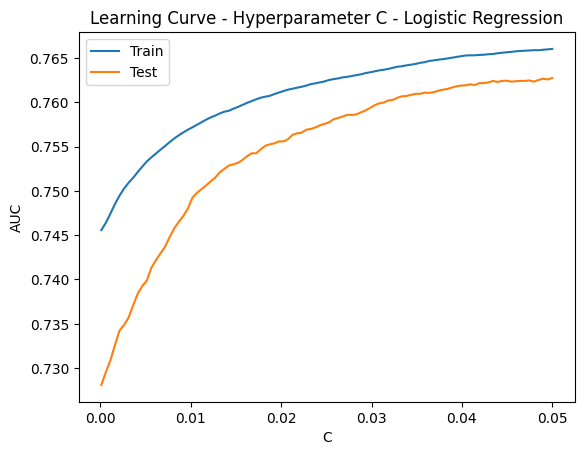

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.71
Recall (Test Set): 0.50
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.90
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7784259894538803


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.83
Recall (Test Set): 0.50
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.85
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7779816413801436


param value: 1; train: 1.0; test: 0.6918738996478873
param value: 2; train: 0.9582784414616987; test: 0.7173608054577465
param value: 3; train: 0.9273702942434234; test: 0.7155314700704225
param value: 4; train: 0.9115364321088135; test: 0.7254346390845071
param value: 5; train: 0.8963707563697563; test: 0.726961377640845
param value: 6; train: 0.8861505221337821; test: 0.7329307878521126
param value: 7; train: 0.8770674980342388; test: 0.7481018926056339
param value: 8; train: 0.8714624918955457; test: 0.7562720070422535
param value: 9; train: 0.8647970092839111; test: 0.7597793794014085
param value: 10; train: 0.8572262418783022; test: 0.7627640845070423
param value: 11; train: 0.8555855209612229; test: 0.7599306778169014
param value: 12; train: 0.8558105488957249; test: 0.7521594410211269
param value: 13; train: 0.8518704046019506; test: 0.76349306778169
param value: 14; train: 0.8487458787987474; test: 0.764497139084507
param value: 15; train: 0.8434184933302065; test: 0.7631216989

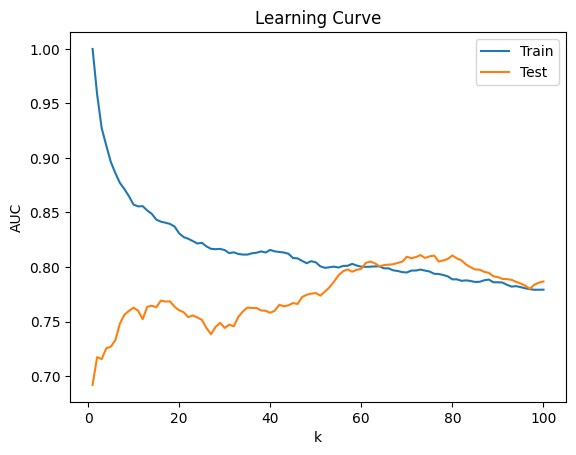

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Model Training 2

#### Decision Tree

In [ ]:
#fit model
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.59
Recall (Test Set): 0.62
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.69
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7743679016500966


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.84
Recall (Test Set): 0.54
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.87
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7754915445491577


param value: 1; train: 1.0; test: 0.6958076584507042
param value: 2; train: 0.9882304355023382; test: 0.7111300616197183
param value: 3; train: 0.9727535142293526; test: 0.7384600572183099
param value: 4; train: 0.9580904870949496; test: 0.7476617517605635
param value: 5; train: 0.945813100936668; test: 0.762571522887324
param value: 6; train: 0.9361601785049178; test: 0.771511883802817
param value: 7; train: 0.9286428660109531; test: 0.765349911971831
param value: 8; train: 0.9221299885503027; test: 0.7624339788732395
param value: 9; train: 0.915437778482846; test: 0.7630254181338028
param value: 10; train: 0.9104104302603081; test: 0.7703014964788732
param value: 11; train: 0.9046519567946366; test: 0.7815801056338029
param value: 12; train: 0.900279000151743; test: 0.7602332746478874
param value: 13; train: 0.897376053579065; test: 0.763396786971831
param value: 14; train: 0.8946386447972852; test: 0.7571522887323944
param value: 15; train: 0.8920443572305528; test: 0.75316351232394

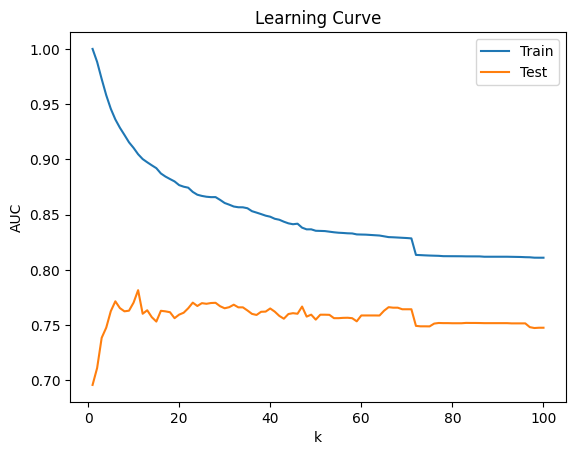

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

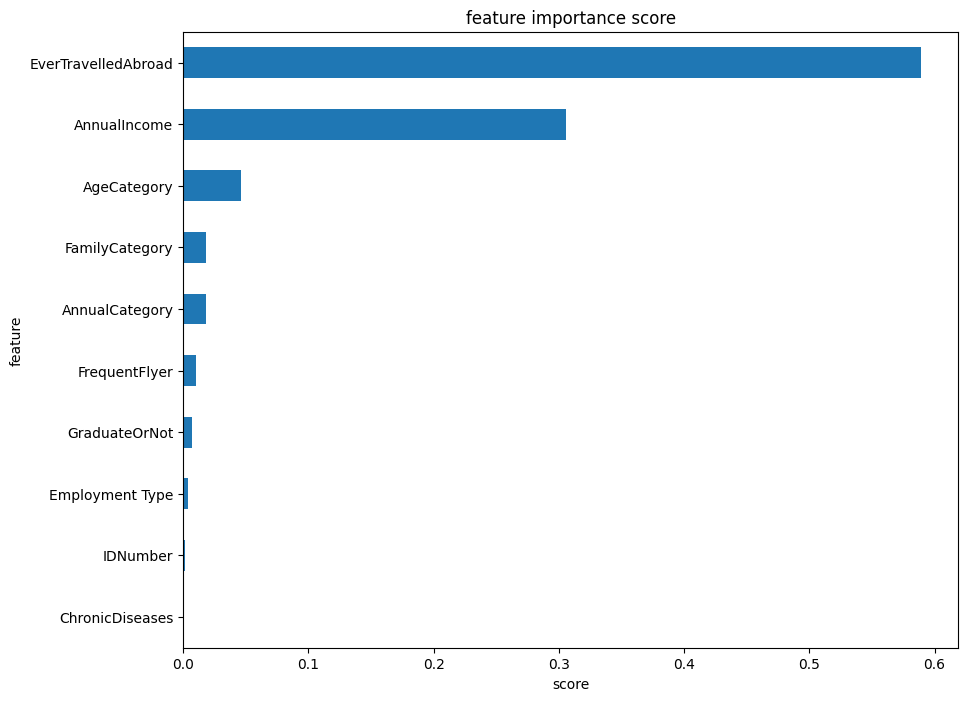

In [ ]:
show_feature_importance(model.best_estimator_)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# decision tree
rf = DecisionTreeClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.56
Recall (Test Set): 0.61
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.68
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7740771605737365


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.85
Recall (Test Set): 0.53
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.84
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7766078841307651


param value: 1; train: 1.0; test: 0.7706040933098592
param value: 2; train: 0.985844794526217; test: 0.7677156690140845
param value: 3; train: 0.9718499537873667; test: 0.7831481073943662
param value: 4; train: 0.9594587603978425; test: 0.7803834727112676
param value: 5; train: 0.9437818142941883; test: 0.7789392605633803
param value: 6; train: 0.9367283524851361; test: 0.7834094410211268
param value: 7; train: 0.9260106427004731; test: 0.7837257922535211
param value: 8; train: 0.9167517346981005; test: 0.7861190580985915
param value: 9; train: 0.91044922818005; test: 0.7827079665492959
param value: 10; train: 0.9076342235587866; test: 0.7848261443661971
param value: 11; train: 0.8925582141231326; test: 0.7850187059859155
param value: 12; train: 0.8915132568180879; test: 0.7889799735915494
param value: 13; train: 0.8836709039742865; test: 0.7829830545774649
param value: 14; train: 0.8748646383689009; test: 0.7778801716549295
param value: 15; train: 0.8753509056296644; test: 0.773162411

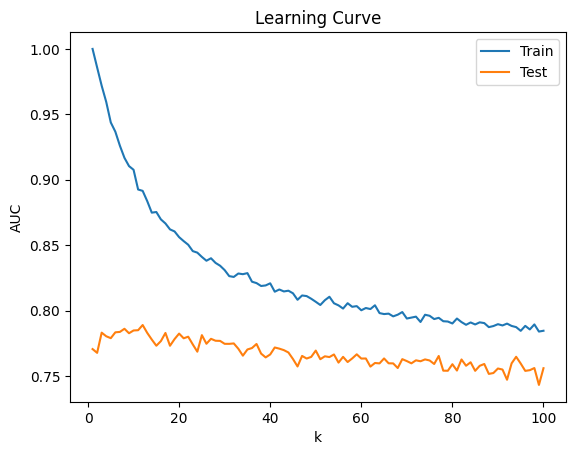

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(min_samples_leaf=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Model Training 3